<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado/blob/main/Trabalho_1_%E2%80%93_Modelos_de_Aprendizado_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Aureo Nildo X. dos Santos Jr.
*   Luciano Semicheche
*   Willian M. Cella



A base de dados *poker-hand-testing* foi extraída de: https://archive-beta.ics.uci.edu/dataset/158/poker+hand
### S = Suits(Naipes) Valores de 1 a 4
### C = Cards(Cartas) Valores de 1 a 13
#### Cartas Maos
   - S1 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C1 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S2 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C2 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S3 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C3 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S4 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C4 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
   - S5 = Naipes = Heart♥️, Spades♠️, Diamonds♦️, Clubs♣️
   - C5 = Valores= A, 2, 3, 4, 5, 6, 7, 8, 9, 10 , J, Q, K
#### Jogadas possiveis   
   - CLASS = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

#### DESCRICAO CLASSES
- 0: Nothing in hand; not a recognized poker hand

- 1: One pair; one pair of equal ranks within five cards

- 2: Two pairs; two pairs of equal ranks within five cards

- 3: Three of a kind; three equal ranks within five cards

- 4: Straight; five cards, sequentially ranked with no gaps

- 5: Flush; five cards with the same suit

- 6: Full house; pair + different rank three of a kind

- 7: Four of a kind; four equal ranks within five cards

- 8: Straight flush; straight + flush

- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
dados = pd.read_csv("/content/drive/MyDrive/Shared/poker-hand-testing3.csv", sep = ';')
#dados = pd.read_csv("poker-hand-testing3.csv", sep=';')
x = dados.iloc[:, :10].values # Cria uma matriz com todos os valores exceto as classes
y = dados['Class'].values     # Cria um array com os valores das classes

# Cria um dataFrame com a matriz de dados com os nomes de todas as colunas exceto a última
df_temp = pd.DataFrame(dados,columns=dados.columns[:-1])
df_temp

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,1,13,2,4,2,3,1,12
1,3,12,3,2,3,11,4,5,2,5
2,1,9,4,6,1,4,3,2,3,9
3,1,4,3,13,2,13,2,1,3,6
4,3,10,2,7,1,2,2,11,4,9
...,...,...,...,...,...,...,...,...,...,...
995,4,6,4,3,1,4,2,7,1,2
996,2,8,4,10,3,6,2,4,3,3
997,4,3,4,7,3,6,4,12,1,1
998,1,4,4,8,4,5,3,9,2,1


In [4]:
dados.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.442000,7.235000,2.489000,6.964000,2.525000,7.278000,2.524000,7.101000,2.458000,6.870000,1.897000
std,1.121559,3.826018,1.136297,3.715981,1.118314,3.757237,1.123693,3.721915,1.087851,3.793084,2.227409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,0.000000
50%,2.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,1.000000
75%,3.000000,11.000000,4.000000,10.000000,4.000000,11.000000,4.000000,10.000000,3.000000,10.000000,3.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [5]:
dados.shape

(1000, 11)

In [6]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

In [63]:
# KNN
knn_best_result = []
knn_result = []

for i in range(1, 51):
  for j in ["uniform","distance"]:
   KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
   KNN.fit(x_treino,y_treino)
   pred = KNN.predict(x_validacao)
   result = accuracy_score(y_validacao, pred)
   knn_result.append({
       'acc': result,
       'weight': j,
       'kneighbor': i,
       'predict': pred})

knn_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
knn_best_result = knn_result[-1:] # melhor resultado

df_knn = pd.DataFrame.from_dict(knn_best_result)

# Busca a melhor predição
knn_pred = df_knn['predict'].values[0]
display(df_knn[['acc','weight','kneighbor']])

,acc,weight,kneighbor
0,0.484,distance,18


In [64]:
# DT - Arvore de descisao 
dt_result = []

for i in range(1, 11):
  treeD = DecisionTreeClassifier(max_depth=10, min_samples_split=3) # utilizando critério gini e splitter best - default
  treeD = treeD.fit(x_treino, y_treino)
  predTree = treeD.predict(x_validacao)
  resultTree = accuracy_score(y_validacao, predTree)
  dt_result.append({
       'acc': resultTree,
       'predict': predTree})

dt_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
df_dt = pd.DataFrame.from_dict(dt_result[-1:])

dt_pred = df_dt['predict'].values[0]
display(df_dt[['acc']])


,acc
0,0.348


In [65]:
# RF - Floresta randomica
rf_best_result = []
rf_result = []

max_depth = 10
min_samples_split = 3
for i in range(1, 11):
    for estimado in range(50, 250, 50):
        rndForest = RandomForestClassifier(n_estimators=estimado, max_depth=max_depth, min_samples_split=min_samples_split)
        rndForest = rndForest.fit(x_treino, y_treino)
        predictRF = rndForest.predict(x_validacao)
        accRF = accuracy_score(y_validacao, predictRF)
        rf_result.append({
            'acc': accRF,
            'estimado': estimado
        })
res = {}
for rf in rf_result:
    if rf['estimado'] not in res.keys():
         res.setdefault(rf['estimado'], [])
    if rf['estimado'] in res.keys():
        res[rf['estimado']].append(rf['acc'])

for k, v in res.items():
  res[k] = max(v)

rf_result = { max(res) : res[max(res)]}
pd.DataFrame.from_dict([rf_result])

,200
0,0.46


In [66]:
# SVM 
svm_best_result = []
svm_result = []

from sklearn.svm import SVC
for sm in range (1, 11):
  for kern in ['linear', 'poly', 'rbf','sigmoid']:
    SVM = SVC(kernel=kern, C=sm/10) ## instanciando o classificador e seus parametros
    SVM.fit(x_treino,y_treino) ## treinando o classificador
    predictSVM = SVM.predict(x_validacao) ## colhendo a opiniao do classificador
    accSVM = accuracy_score(y_validacao, predictSVM) # calc a acuracia
    svm_result.append({
            'acc': accSVM,
            'C': sm/10,
            'kern': kern,
            'predict': predictSVM
        })
svm_result.sort(key=lambda x: x['acc']) # orderna pela % acuracia
df_svm = pd.DataFrame.from_dict(svm_result[-1:]) # melhor resultado

svm_pred = df_svm['predict'].values[0]
display(df_svm[['acc','C','kern']])

,acc,C,kern
0,0.44,0.5,sigmoid


In [86]:
df_knn

,acc,weight,kneighbor,predict
0,0.484,distance,18,"[0, 0, 8, 0, 0, 0, 6, 0, 0, 0, 0, 0, 4, 0, 0, ..."


KNN: 
f-measure :  0.32214238956564545
acuracia :  0.456
auc :  0.46720000000000006
f-measure :  0.3450417040620303
acuracia :  0.468
auc :  0.49084444444444447
f-measure :  0.34467599466286025
acuracia :  0.468
auc :  0.4682666666666667
f-measure :  0.36859869036381493
acuracia :  0.48
auc :  0.4378666666666667
f-measure :  0.3261170653907495
acuracia :  0.44
auc :  0.4876474926253687
f-measure :  0.35773976469283447
acuracia :  0.472
auc :  0.5286688790560472
f-measure :  0.3690232926950143
acuracia :  0.476
auc :  0.5552888888888889
f-measure :  0.31833445019798967
acuracia :  0.444
auc :  0.45777777777777784
f-measure :  0.3049529202125002
acuracia :  0.424
auc :  0.5125333333333334
f-measure :  0.33557566430353064
acuracia :  0.456
auc :  0.5529777777777779


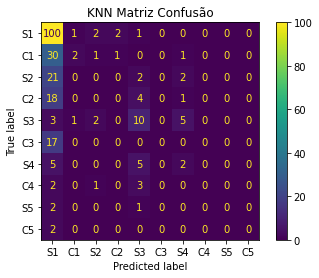

In [123]:
## KNN - Classificação
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

knn_clf = []
knn =  KNeighborsClassifier(n_neighbors=df_knn['kneighbor'][0],weights=df_knn['weight'][0])
for i in range (1, 11):
  x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
  x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
  knn.fit(x_treino,y_treino)
  predict = knn.predict(x_teste)
  fmeasure = metrics.f1_score(y_teste, predict, average='weighted') # F-Measure
  acuracia = accuracy_score(y_teste, predict) # Acurácia
  y_score = knn.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
  fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

  knn_clf.append({
      'f-measure': fmeasure,
      'acuracia': acuracia,
      'auc': metrics.auc(fpr,tpr)
  })

disp = ConfusionMatrixDisplay.from_estimator(knn, x_teste, y_teste, display_labels=dados.columns[:-1])
disp.ax_.set_title('KNN Matriz Confusão')
print("KNN: ")
for i, knn in enumerate(knn_clf):
  for k, v in knn.items():
    print(k,': ',v)


In [124]:
## DT - Árvore de decisão - Classificação
dt_clf = []
dt =  DecisionTreeClassifier(max_depth=10, min_samples_split=3)
for i in range (1, 11):
  x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,dados['Class'],test_size=0.5,stratify=dados['Class'],shuffle=True)
  x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)
  
  dt.fit(x_treino,y_treino)
  predTree = dt.predict(x_teste)
  fmeasure = metrics.f1_score(y_teste, predict, average='weighted') # F-Measure
  acuracia = accuracy_score(y_teste, predict) # Acurácia
  y_score = dt.predict_proba(x_teste)[:,1] # Taxa de verdadeiro positivo
  fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

  dt_clf.append({
      'f-measure': fmeasure,
      'acuracia': acuracia,
      'auc': metrics.auc(fpr,tpr)
  })

print("DT - Árvore de decisão: ")
for i, dt in enumerate(dt_clf):
  for k, v in dt.items():
    print(k,': ',v)


DT - Árvore de decisão: 
f-measure :  0.24521498371335498
acuracia :  0.348
auc :  0.5196349557522124
f-measure :  0.2711682751912844
acuracia :  0.372
auc :  0.5126222222222222
f-measure :  0.2350900493853105
acuracia :  0.332
auc :  0.41271111111111114
f-measure :  0.22691081800969165
acuracia :  0.32
auc :  0.4901333333333333
f-measure :  0.2599100598935877
acuracia :  0.36
auc :  0.5199111111111111
f-measure :  0.2561803536336991
acuracia :  0.36
auc :  0.5049777777777777
f-measure :  0.2533167650649051
acuracia :  0.352
auc :  0.5726222222222221
f-measure :  0.2336358022942926
acuracia :  0.328
auc :  0.6110803834808259
f-measure :  0.2804045246852318
acuracia :  0.376
auc :  0.4759111111111111
f-measure :  0.268119642565711
acuracia :  0.376
auc :  0.4875555555555556


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      0.94      0.65       106
           1       0.33      0.03      0.05        35
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        23
           4       0.35      0.76      0.48        21
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.47       250
   macro avg       0.12      0.17      0.12       250
weighted avg       0.29      0.47      0.32       250

AUC KNN:  0.5379555555555555
AUC NB:  0.5736888888888888
AUC DT:  0.5296000000000001
AUC RF:  0.5251555555555556


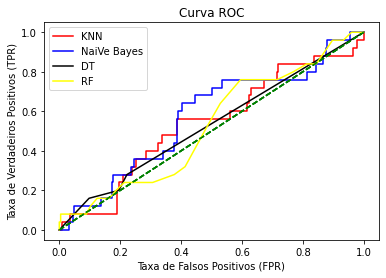

In [ ]:
import matplotlib.pyplot as plt

from sklearn import metrics
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    #plt.show()

## KNN
plot_roc_curve(fpr, tpr,"red","KNN")

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_treino,y_treino)
y_score = NB.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC NB: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")

# DT - Árvore de decisão
y_score = treeD.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"black","DT")

#from sklearn.svm import SVC  
#SVM = SVC(kernel='linear') 
#SVM.fit(x, y) 

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_split=2)
RF.fit(x_treino,y_treino)
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))
plot_roc_curve(fpr, tpr,"yellow","RF")

plt.show()